<div style="background-color:Teal;color:Beige;padding:30px 0px 30px 0px;text-align:center; font-size:36px;font-family:Roboto Condensed;margin:0;overflow:hidden;border:5px solid  Beige;border-radius:10px;">PS3E11 Media Campaign Cost | LGB+XGB 0.29325</div>

<table style="width:100%;border-collapse:collapse;margin:0;overflow:hidden;font-family:Roboto Condensed;"><tr>
<td style="width:12.5%;background-color:Beige;color:Teal;border:2px solid Teal;font-size:20px;text-align:center;">Task</td>
<td style="width:12.5%;background-color:Beige;color:Teal;border:2px solid Teal;font-size:20px;text-align:center;">Method</td>
<td style="width:12.5%;background-color:Beige;color:Teal;border:2px solid Teal;font-size:20px;text-align:center;">Target</td>
<td style="width:12.5%;background-color:Beige;color:Teal;border:2px solid Teal;font-size:20px;text-align:center;">Feature</td>
<td style="width:12.5%;background-color:Beige;color:Teal;border:2px solid Teal;font-size:20px;text-align:center;">Train</td>
<td style="width:12.5%;background-color:Beige;color:Teal;border:2px solid Teal;font-size:20px;text-align:center;">Test</td>
<td style="width:12.5%;background-color:Beige;color:Teal;border:2px solid Teal;font-size:20px;text-align:center;">Original</td>
<td style="width:12.5%;background-color:Beige;color:Teal;border:2px solid Teal;font-size:20px;text-align:center;">Metric</td>
</tr><tr>
<td style="background-color:White;color:DarkSlateGray;border:2px solid Teal;font-size:16px;text-align:center;">Regression</td>
<td style="background-color:White;color:DarkSlateGray;border:2px solid Teal;font-size:16px;text-align:center;">LGB + XGB</td>
<td style="background-color:White;color:DarkSlateGray;border:2px solid Teal;font-size:16px;text-align:center;">cost</td>
<td style="background-color:White;color:DarkSlateGray;border:2px solid Teal;font-size:16px;text-align:center;">15</td>
<td style="background-color:White;color:DarkSlateGray;border:2px solid Teal;font-size:16px;text-align:center;">360336</td>
<td style="background-color:White;color:DarkSlateGray;border:2px solid Teal;font-size:16px;text-align:center;">240224</td>
<td style="background-color:White;color:DarkSlateGray;border:2px solid Teal;font-size:16px;text-align:center;">51363</td>
<td style="background-color:White;color:DarkSlateGray;border:2px solid Teal;font-size:16px;text-align:center;">RMLSE</td>
</tr><tr>    
<td colspan="8" style="text-align:center; font-size:16px; color:White;">----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----</td>
</tr><tr>    
<td colspan="2" style="background-color:Beige;color:Teal;border:2px solid Teal;font-size:20px;text-align:center;">Summary</td>
<td colspan="6" style="background-color:Beige;color:Teal;border:2px solid Teal;font-size:20px;text-align:center;">Final Score: 0.29325</td>
</tr><tr>        
<td colspan="2" style="background-color:White;color:DarkSlateGray;border:2px solid Teal;font-size:16px;text-align:center;">Final Model</td>
<td colspan="6" style="background-color:White;color:DarkSlateGray;border:2px solid Teal;font-size:16px;text-align:left;">Blended one LightGBM model and one XGBoost model.</td>
</tr><tr>        
<td colspan="2" style="background-color:White;color:DarkSlateGray;border:2px solid Teal;font-size:16px;text-align:center;">Key Strategy</td>
<td colspan="6" style="background-color:White;color:DarkSlateGray;border:2px solid Teal;font-size:16px;text-align:left;">Removed unnecessary features and optimized hyperparameters.</td>
</tr><tr>       
<td colspan="2" style="background-color:White;color:DarkSlateGray;border:2px solid Teal;font-size:16px;text-align:center;">Feature Engineering</td>
<td colspan="6" style="background-color:White;color:DarkSlateGray;border:2px solid Teal;font-size:16px;text-align:left;">Generated two features; others were noise.</td>
</tr><tr>        
<td colspan="2" style="background-color:White;color:DarkSlateGray;border:2px solid Teal;font-size:16px;text-align:center;">Original Data</td>
<td colspan="6" style="background-color:White;color:DarkSlateGray;border:2px solid Teal;font-size:16px;text-align:left;">Added original data to the training set but excluded it from the validation set.</td>
</tr><tr>        
<td colspan="2" style="background-color:White;color:DarkSlateGray;border:2px solid Teal;font-size:16px;text-align:center;">Benchmark</td>
<td colspan="6" style="background-color:White;color:DarkSlateGray;border:2px solid Teal;font-size:16px;text-align:left;">Trusted local CV, as it aligned with both the Public LB and Private LB.</td></tr></table>

## <div style="background-color:Teal;color:Beige;padding:10px;font-size:28px;font-family:Roboto Condensed;text-align:center;margin:0;overflow:hidden;border:5px solid Beige;border-radius:10px;">01 - Data Importing</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from itertools import combinations, product

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor, LGBMClassifier, early_stopping
from xgboost import XGBRegressor, XGBClassifier

import optuna
from optuna.samplers import TPESampler
from optuna.importance import get_param_importances

seed = 0
palette = sns.color_palette('colorblind')

In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s3e11/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e11/test.csv')
sub = pd.read_csv('/kaggle/input/playground-series-s3e11/sample_submission.csv')
org = pd.read_csv('/kaggle/input/media-campaign-cost-prediction/train_dataset.csv')

train = train.drop(['id'],axis =1)
test = test.drop(['id'],axis =1)

print('train',train.shape)
print('test',test.shape)
print('org', org.shape)

train (360336, 16)
test (240224, 15)
org (51363, 16)


In [3]:
train['extra'] = 0
org['extra'] = 1
test['extra'] = 0

train = pd.concat([train, org],axis=0)

columns_to_check = [col for col in train.columns if col != 'extra']
train.drop_duplicates(subset=columns_to_check, inplace=True)

print('train',train.shape)
print('test',test.shape)

train (411664, 17)
test (240224, 16)


---
### **The original data and training data have different distributions.**
---

In [4]:
def dataset_difference(train):
    x = train.drop(columns=['extra'])
    y = train['extra']
    
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

    clf = LGBMClassifier(random_state=seed, verbose=0)
    clf.fit(x_train, y_train)
    
    return clf.score(x_test, y_test)

print('train socre', dataset_difference(train))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
train socre 0.8787363511593165


In [5]:
def rename_column(df):

    df = df.rename(columns={
        'store_sales(in millions)': 'store_sales',
        'unit_sales(in millions)': 'unit_sales',
        'num_children_at_home': 'children_at_home',
        'avg_cars_at home(approx).1': 'avg_cars_at_home'
    })
    return df

train = rename_column(train)
test = rename_column(test)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 411664 entries, 0 to 51362
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   store_sales         411664 non-null  float64
 1   unit_sales          411664 non-null  float64
 2   total_children      411664 non-null  float64
 3   children_at_home    411664 non-null  float64
 4   avg_cars_at_home    411664 non-null  float64
 5   gross_weight        411664 non-null  float64
 6   recyclable_package  411664 non-null  float64
 7   low_fat             411664 non-null  float64
 8   units_per_case      411664 non-null  float64
 9   store_sqft          411664 non-null  float64
 10  coffee_bar          411664 non-null  float64
 11  video_store         411664 non-null  float64
 12  salad_bar           411664 non-null  float64
 13  prepared_food       411664 non-null  float64
 14  florist             411664 non-null  float64
 15  cost                411664 non-null  flo

## <div style="background-color:Teal;color:Beige;padding:10px;font-size:28px;font-family:Roboto Condensed;text-align:center;margin:0;overflow:hidden;border:5px solid Beige;border-radius:10px;">02 - Data Exploration</div>

In [7]:
target = 'cost'

print(train.drop([target], axis=1).isnull().sum().sum())
print(test.isnull().sum().sum())

print(train.duplicated().sum())
print(train.drop([target], axis=1).duplicated().sum())
print(test.duplicated().sum())

0
0
0
506
0


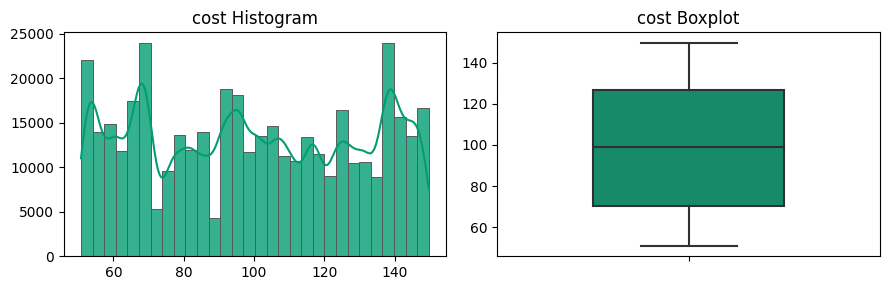

In [8]:
target = 'cost'

fig, axes = plt.subplots(1, 2, figsize=(9, 3))

sns.histplot(train[target], bins=30, kde=True, color=palette[2], ax=axes[0], 
             edgecolor='#595959', alpha=0.8)
axes[0].set_title(f'{target} Histogram')
axes[0].set_xlabel('')
axes[0].set_ylabel('')

sns.boxplot(data=train, y=target, ax=axes[1], color=palette[2], width=0.5)
axes[1].set_title(f'{target} Boxplot')
axes[1].set_xlabel('')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

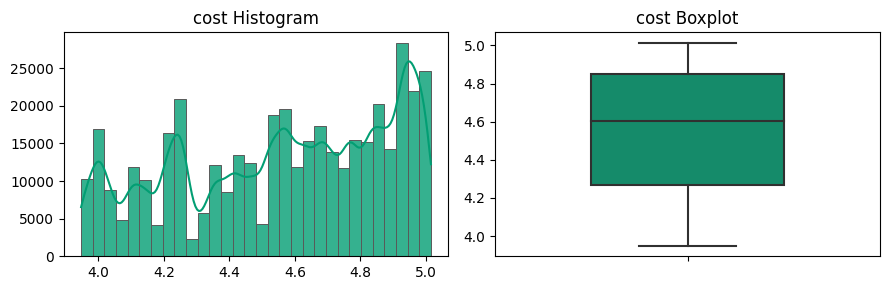

In [9]:
train[target] = np.log1p(train[target])

fig, axes = plt.subplots(1, 2, figsize=(9, 3))

sns.histplot(train[target], bins=30, kde=True, color=palette[2], ax=axes[0], 
             edgecolor='#595959', alpha=0.8)
axes[0].set_title(f'{target} Histogram')
axes[0].set_xlabel('')
axes[0].set_ylabel('')

sns.boxplot(data=train, y=target, ax=axes[1], color=palette[2], width=0.5)
axes[1].set_title(f'{target} Boxplot')
axes[1].set_xlabel('')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [10]:
def tabel(train, test, target):
    table = pd.DataFrame()
    train = train.drop(columns=[target]) if target in train.columns else train

    numeric_cols_train = train.select_dtypes(include=[np.number])
    numeric_cols_test = test.select_dtypes(include=[np.number])
    desc_train = numeric_cols_train.describe().transpose()
    desc_test = numeric_cols_test.describe().transpose()

    table['Type'] = train.dtypes
    table['trNull'] = train.isnull().sum()
    table['teNull'] = test.isnull().sum()
    table['trUni'] = train.nunique()
    table['teUni'] = test.nunique()
    table['trMean'] = desc_train['mean'].round(1)
    table['teMean'] = desc_test['mean'].round(1)
    table['trMin'] = desc_train['min'].round(1)
    table['teMin'] = desc_test['min'].round(1)
    table['trMax'] = desc_train['max'].round(1)
    table['teMax'] = desc_test['max'].round(1)

    int_metric = ['trNull', 'teNull', 'trUni', 'teUni']
    table[int_metric] = table[int_metric].fillna(0).astype(int)
    table = table.sort_values(by='teUni')

    return table

tabel(train, test, target)

,Type,trNull,teNull,trUni,teUni,trMean,teMean,trMin,teMin,trMax,teMax
extra,int64,0,0,2,1,0.1,0.0,0.0,0.0,1.0,0.0
recyclable_package,float64,0,0,2,2,0.6,0.6,0.0,0.0,1.0,1.0
florist,float64,0,0,2,2,0.5,0.5,0.0,0.0,1.0,1.0
low_fat,float64,0,0,2,2,0.3,0.3,0.0,0.0,1.0,1.0
coffee_bar,float64,0,0,2,2,0.6,0.6,0.0,0.0,1.0,1.0
salad_bar,float64,0,0,2,2,0.5,0.5,0.0,0.0,1.0,1.0
video_store,float64,0,0,2,2,0.3,0.3,0.0,0.0,1.0,1.0
prepared_food,float64,0,0,2,2,0.5,0.5,0.0,0.0,1.0,1.0
avg_cars_at_home,float64,0,0,5,5,2.2,2.2,0.0,0.0,4.0,4.0
unit_sales,float64,0,0,6,6,3.0,3.0,1.0,1.0,6.0,6.0


## <div style="background-color:Teal;color:Beige;padding:10px;font-size:28px;font-family:Roboto Condensed;text-align:center;margin:0;overflow:hidden;border:5px solid Beige;border-radius:10px;">03 - Categorical Features</div>

In [11]:
df1 = pd.concat([train, test], axis=0)

cat_features = df1.columns[df1.nunique() < 20].drop(['extra']).tolist()

cat_features

['unit_sales',
 'total_children',
 'children_at_home',
 'avg_cars_at_home',
 'recyclable_package',
 'low_fat',
 'coffee_bar',
 'video_store',
 'salad_bar',
 'prepared_food',
 'florist']

In [12]:
def cat_plot(train, cat_features, target):
    num_rows = len(cat_features)
    fig, axes = plt.subplots(num_rows, 2, figsize=(9, 2 * num_rows))
    axes = axes.reshape(-1, 2)

    for i, feature in enumerate(cat_features):
        unique_values = train[feature].nunique()
        sns.histplot(data=train, x=feature, bins=unique_values, kde=False, color=palette[2],
                     edgecolor='black', ax=axes[i][0], alpha=0.8, discrete=True)
        axes[i][0].set_title(f'{feature}')
        axes[i][0].set_xlabel('')
        axes[i][0].set_ylabel('')
        axes[i][0].set_xticks(sorted(train[feature].unique()))
        axes[i][0].set_xticklabels(sorted(train[feature].unique()), ha='center') 
        axes[i][0].tick_params(labelsize=8)

        sns.boxplot(data=train, x=feature, y=target, ax=axes[i][1], 
                    palette=[palette[2]])
        axes[i][1].set_title(f'{feature} vs {target}')
        axes[i][1].set_xlabel('')
        axes[i][1].set_ylabel('')
        axes[i][1].tick_params(labelsize=8)

    plt.tight_layout()
    plt.show()

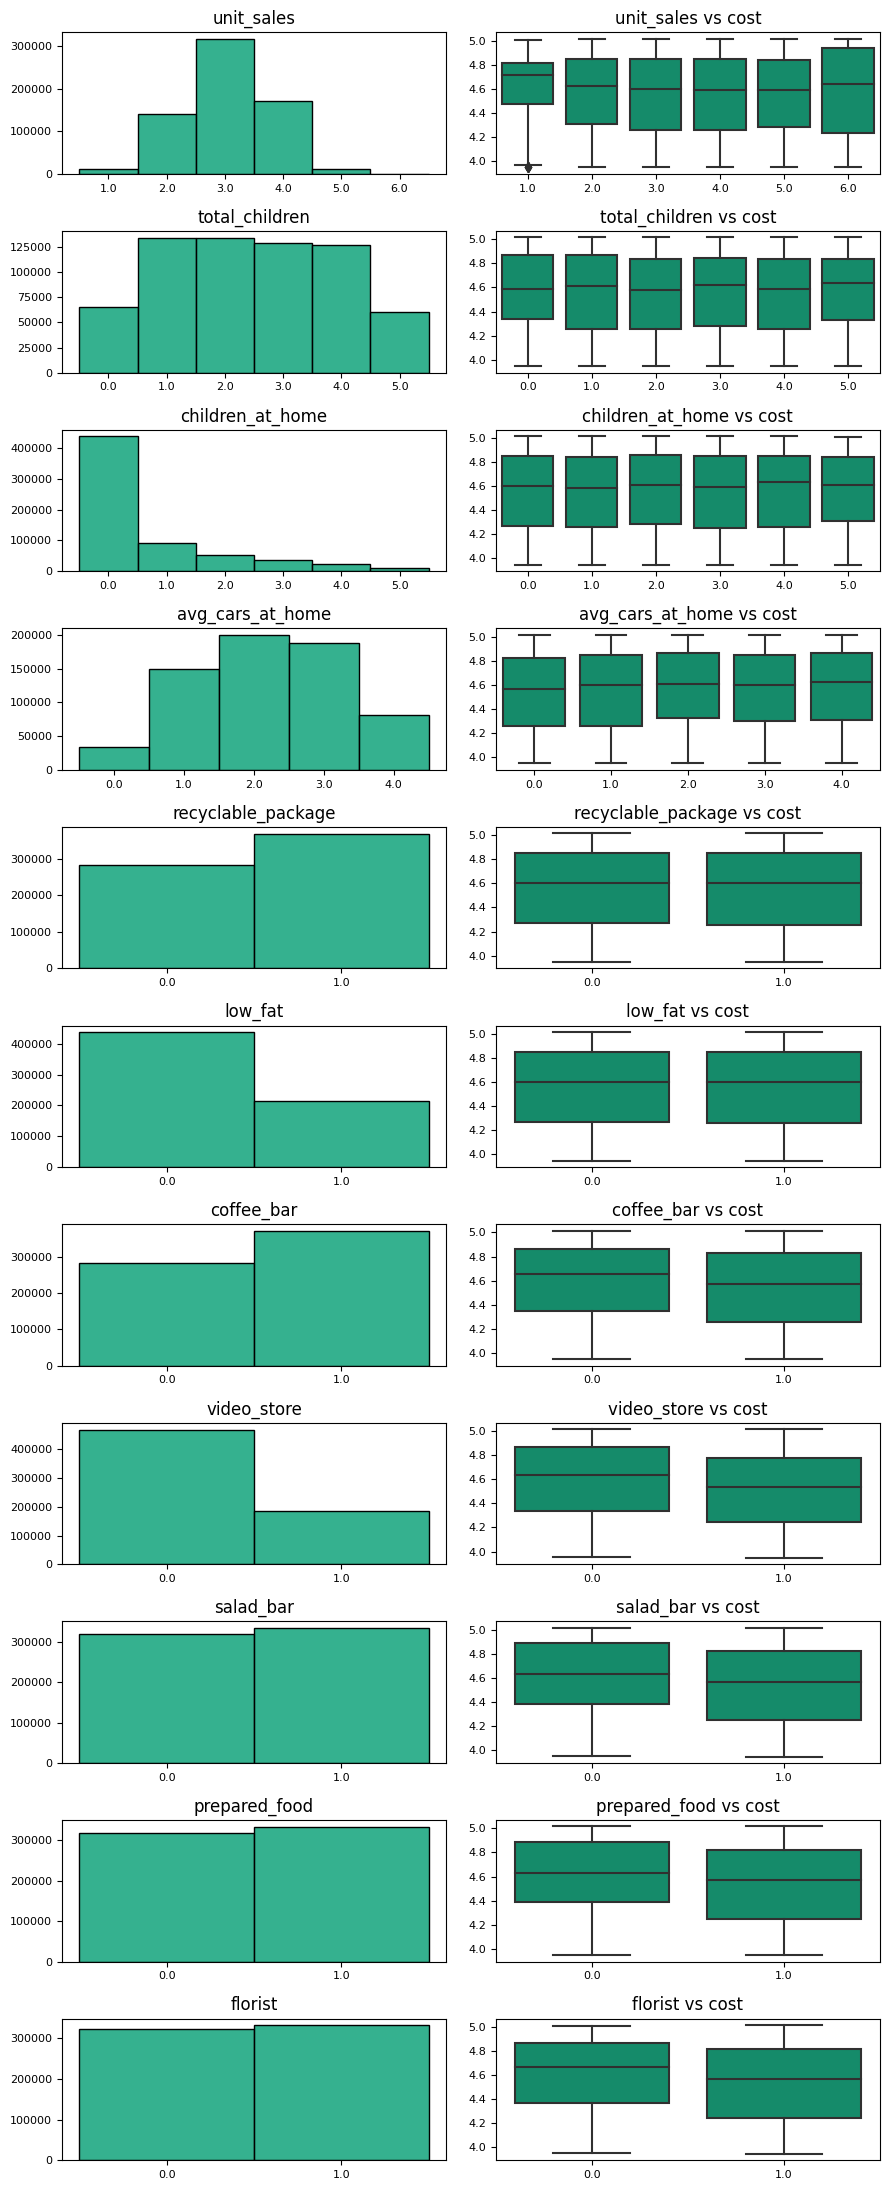

In [13]:
sample = df1.sample(n=10000, random_state=seed)

cat_plot(df1, cat_features, target)

## <div style="background-color:Teal;color:Beige;padding:10px;font-size:28px;font-family:Roboto Condensed;text-align:center;margin:0;overflow:hidden;border:5px solid Beige;border-radius:10px;">04 - Numerical Features</div>

In [14]:
df2 = df1.copy()

num_features = df2.columns[df2.nunique() >= 20].drop([target]).tolist()
num_features

['store_sales', 'gross_weight', 'units_per_case', 'store_sqft']

In [15]:
def remove_outlier(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        #df[column] = np.clip(df[column], lower_bound, upper_bound)
        df[column] = df[column].apply(lambda x: x if lower_bound <= x else np.nan)
        df[column] = df[column].apply(lambda x: x if x <= upper_bound else np.nan)
                                      
    return df

out_features = num_features
df2 = remove_outlier(df2, out_features)
df2.drop([target], axis=1).isnull().sum().sum()

3

In [16]:
imputer = KNNImputer(n_neighbors=10, weights='uniform')

df2[num_features] = imputer.fit_transform(df2[num_features])
df2.drop([target], axis=1).isnull().sum().sum()

0

In [17]:
def num_preprocess(df):
    

    return df

df2 = num_preprocess(df2)

In [18]:
def num_plot(train, num_features, target):
    num_rows = len(num_features)
    fig, axes = plt.subplots(num_rows, 2, figsize=(9, 2 * num_rows))
    axes = axes.reshape(-1, 2)

    for i, feature in enumerate(num_features):
        sns.histplot(data=train, x=feature, bins=15, kde=False, color=palette[2],
                     edgecolor='black', ax=axes[i][0], alpha=0.8)
        axes[i][0].set_title(f'{feature}')
        axes[i][0].set_xlabel('')
        axes[i][0].set_ylabel('')
        axes[i][0].tick_params(labelsize=8)

        sns.scatterplot(data=train, x=feature, y=target, ax=axes[i][1], 
                        alpha=0.8, color=palette[2], edgecolor='black')
        axes[i][1].set_title(f'{feature} vs {target}')
        axes[i][1].set_xlabel('')
        axes[i][1].set_ylabel('')
        axes[i][1].tick_params(labelsize=8)

    plt.tight_layout()
    plt.show()

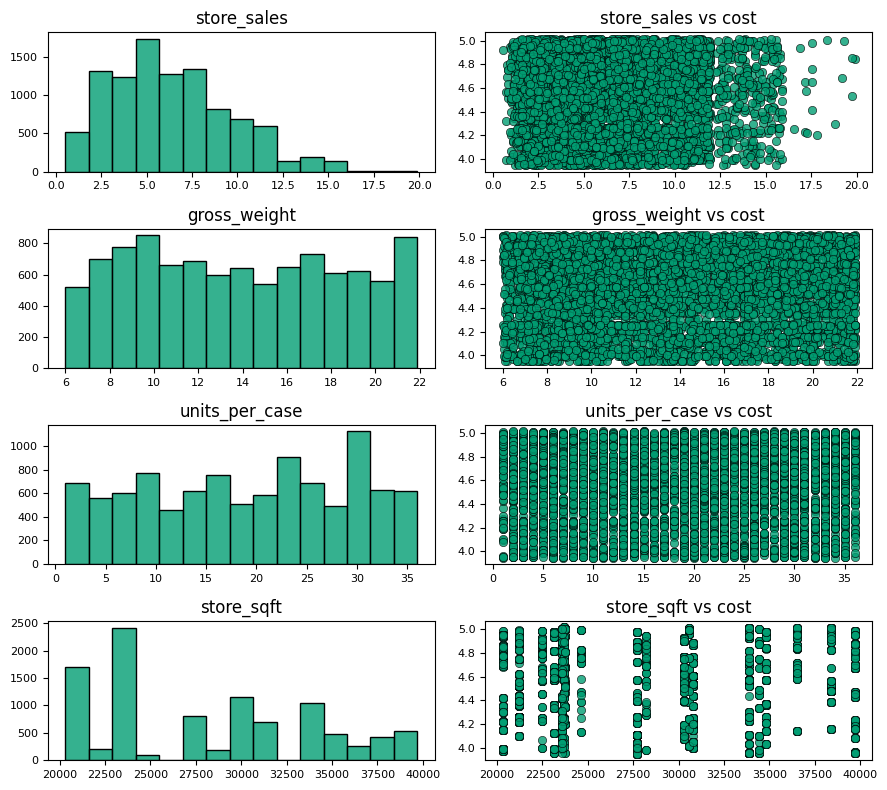

In [19]:
sample = df1.sample(n=10000, random_state=seed)

num_plot(sample, num_features, target)

## <div style="background-color:Teal;color:Beige;padding:10px;font-size:28px;font-family:Roboto Condensed;text-align:center;margin:0;overflow:hidden;border:5px solid Beige;border-radius:10px;">05 - Feature Engineering</div>

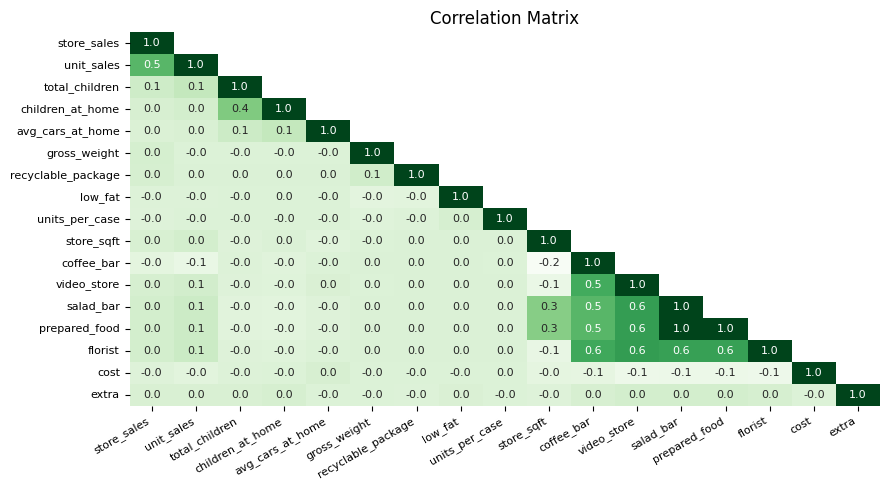

In [20]:
df3 = df2.copy()

correlation_matrix = df3.select_dtypes(include=['number']).corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
plt.figure(figsize=(9, 5))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".1f", cmap='Greens', 
            cbar=False, annot_kws={"size": 8})
plt.xticks(rotation=30, ha='right')
plt.tick_params(labelsize=8)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

---
### **Generating two features, while the others are noise.**
---

In [21]:
def new_preprocess(df):

    df['n_facilities'] = df['coffee_bar'] + df['video_store'] + df['salad_bar'] + df['florist']
    
    df['facilities_sqft'] = df['n_facilities'] / df['store_sqft']

    #df['children_ratio'] = (df['children_at_home']+1) / (df['total_children']+1)
    
    #df['sales_sqft'] = df['store_sales'] / df['store_sqft']
    
    #df['hasCar']  =  (df['avg_cars_at_home'] >= 1).astype(int)
    
    #df['hasChild']   =  (df['total_children'] >= 1).astype(int)
    
    return df

df3 = new_preprocess(df3)

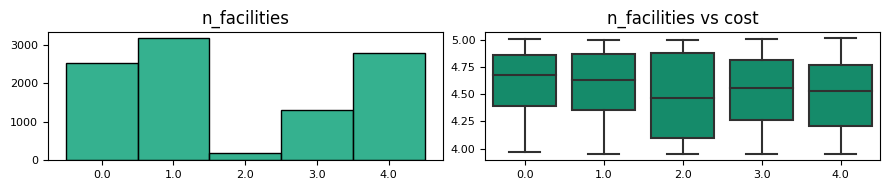

In [22]:
sample = df3.sample(n=10000, random_state=seed)

cat_plot(sample, ['n_facilities'], target)

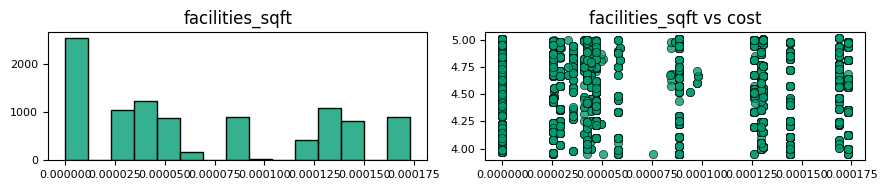

In [23]:
sample = df3.sample(n=10000, random_state=seed)

num_plot(sample, ['facilities_sqft'], target)

---
### **Removing unnecessary features, as they are all noise.**
---

In [24]:
cols_to_drop = [
    'prepared_food',
    'low_fat', 
    'gross_weight', 
    'recyclable_package', 
    'units_per_case', 
    'store_sales', 
    'unit_sales', 
]

df3 = df3.drop(columns=cols_to_drop)

In [25]:
# Category Features

cat_features =  df3.columns[df3.nunique() < 10].drop(['extra']).tolist()

df3[cat_features] = df3[cat_features].astype('int')

cat_features

['total_children',
 'children_at_home',
 'avg_cars_at_home',
 'coffee_bar',
 'video_store',
 'salad_bar',
 'florist',
 'n_facilities']

In [26]:
# Numerical Features

num_features =  df3.columns[df3.nunique() >= 10].drop([target]).tolist()

df3[num_features] = MinMaxScaler().fit_transform(df3[num_features])

num_features

['store_sqft', 'facilities_sqft']

In [27]:
x_train_all = df3.iloc[:len(train)]
x_test = df3.iloc[len(train):].drop(columns=[target])

print('x_train_all', x_train_all.shape)
print('x_test_all', x_test.shape)

x_train_all (411664, 12)
x_test_all (240224, 11)


In [28]:
tabel(x_train_all, x_test, target)

,Type,trNull,teNull,trUni,teUni,trMean,teMean,trMin,teMin,trMax,teMax
extra,int64,0,0,2,1,0.1,0.0,0.0,0.0,1.0,0.0
florist,int64,0,0,2,2,0.5,0.5,0.0,0.0,1.0,1.0
video_store,int64,0,0,2,2,0.3,0.3,0.0,0.0,1.0,1.0
salad_bar,int64,0,0,2,2,0.5,0.5,0.0,0.0,1.0,1.0
coffee_bar,int64,0,0,2,2,0.6,0.6,0.0,0.0,1.0,1.0
avg_cars_at_home,int64,0,0,5,5,2.2,2.2,0.0,0.0,4.0,4.0
n_facilities,int64,0,0,5,5,1.9,1.8,0.0,0.0,4.0,4.0
total_children,int64,0,0,6,6,2.5,2.5,0.0,0.0,5.0,5.0
children_at_home,int64,0,0,6,6,0.7,0.7,0.0,0.0,5.0,5.0
store_sqft,float64,0,0,20,20,0.4,0.4,0.0,0.0,1.0,1.0


In [29]:
#'''
X = x_train_all.drop(columns=[target])
Y = x_train_all[target]

corr = X.corrwith(Y).abs()

mi = mutual_info_regression(X, Y, random_state=seed)
mi_series = pd.Series(mi, index=X.columns)
combined = pd.DataFrame({'Correlation': corr, 
                         'Mutual Info': mi_series})
combined['Average Score'] = combined.mean(axis=1)
combined = combined.sort_values(by='Average Score', ascending=False)

print(combined.round(4))
#'''

                  Correlation  Mutual Info  Average Score
store_sqft             0.0444       2.6913         1.3678
facilities_sqft        0.0908       2.3496         1.2202
n_facilities           0.1133       1.2447         0.6790
florist                0.1151       0.6227         0.3689
salad_bar              0.1010       0.5957         0.3484
coffee_bar             0.0508       0.5847         0.3178
video_store            0.1079       0.5157         0.3118
total_children         0.0048       0.1105         0.0576
avg_cars_at_home       0.0268       0.0881         0.0575
children_at_home       0.0031       0.0811         0.0421
extra                  0.0034       0.0017         0.0025


---
### **Creating 5 folds, adding the original data to training but not validation.**
---

In [30]:
#'''
n = 5
r = 1

x = x_train_all[x_train_all['extra'] == 0].drop(columns=[target])
y = x_train_all[x_train_all['extra'] == 0][target]

extra_x = x_train_all[x_train_all['extra'] == 1].drop(columns=[target])
extra_y = x_train_all[x_train_all['extra'] == 1][target]

kfold = RepeatedKFold(n_splits= n, n_repeats=r, random_state=seed)

folds = []
for train_idx, valid_idx in kfold.split(x, y):
    x_train, x_valid = x.iloc[train_idx], x.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

    x_train = pd.concat([x_train, extra_x], axis=0).reset_index(drop=True)
    y_train = pd.concat([y_train, extra_y], axis=0).reset_index(drop=True)

    folds.append((x_train, x_valid, y_train, y_valid))

print('x_train', x_train.shape)
print('x_valid', x_valid.shape)
print('y_train', y_train.shape)
print('y_valid', y_valid.shape)
#'''

x_train (339597, 11)
x_valid (72067, 11)
y_train (339597,)
y_valid (72067,)


## <div style="background-color:Teal;color:Beige;padding:10px;font-size:28px;font-family:Roboto Condensed;text-align:center;margin:0;overflow:hidden;border:5px solid Beige;border-radius:10px;">06 - LightGBM Model</div>

In [31]:
'''
def objective(trial):
    param = {
        'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.15, step=0.001),
        'max_depth': trial.suggest_int('max_depth', 12, 12, step=1),
        
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1, step=0.01),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5, step=0.01),
        
        'min_split_gain': trial.suggest_float('min_split_gain', 0, 1, step=0.01),
        'min_child_weight': trial.suggest_float('min_child_weight', 0, 5, step=0.01),
        
        'subsample': trial.suggest_float('subsample', 0.2, 1, step=0.01),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.2, 1, step=0.01),
        
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 200, step=1),
        'num_leaves': trial.suggest_int('num_leaves', 10, 200, step=1)
    }
        
    all_y_pred, all_y_valid, iterations  = [], [], []
    for x_train, x_valid, y_train, y_valid in folds:
        model = LGBMRegressor(
            **param,
            device_type='gpu',
            n_estimators=2000, objective='regression', random_state=seed, verbose=-1)

        model.fit(x_train, y_train, eval_set=[(x_valid, y_valid)], eval_metric='rmse',
                  categorical_feature=cat_features, 
                  callbacks=[early_stopping(stopping_rounds=200, verbose=0)])
        
        y_pred = model.predict(x_valid)
        all_y_pred.extend(y_pred)
        all_y_valid.extend(y_valid)
        iterations.append(model.best_iteration_)

    rmse = mean_squared_error(all_y_valid, all_y_pred, squared=False)
    print(f'##### RMSE = {rmse:.5f}, iteration = {np.mean(iterations):.0f} #####')
    return rmse

lgb_study = optuna.create_study(direction='minimize', 
                                sampler=optuna.samplers.TPESampler(seed=seed))
lgb_study.optimize(objective, n_trials=300)

print('---');print(f'best rmse: {lgb_study.best_trial.value:.5f}')
print(f'best_param = {lgb_study.best_trial.params}')
'''

"\ndef objective(trial):\n    param = {\n        'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.15, step=0.001),\n        'max_depth': trial.suggest_int('max_depth', 12, 12, step=1),\n        \n        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1, step=0.01),\n        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5, step=0.01),\n        \n        'min_split_gain': trial.suggest_float('min_split_gain', 0, 1, step=0.01),\n        'min_child_weight': trial.suggest_float('min_child_weight', 0, 5, step=0.01),\n        \n        'subsample': trial.suggest_float('subsample', 0.2, 1, step=0.01),\n        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.2, 1, step=0.01),\n        \n        'min_child_samples': trial.suggest_int('min_child_samples', 10, 200, step=1),\n        'num_leaves': trial.suggest_int('num_leaves', 10, 200, step=1)\n    }\n        \n    all_y_pred, all_y_valid, iterations  = [], [], []\n    for x_train, x_valid, y_train, y_valid in fo

In [32]:
best_param = {'learning_rate': 0.097, 'max_depth': 12, 'reg_alpha': 0.39, 'reg_lambda': 3.22, 
              'min_split_gain': 0.0, 'min_child_weight': 1.96, 'subsample': 0.66, 
              'colsample_bytree': 0.86, 'min_child_samples': 22, 'num_leaves': 134}

rmse, r2, iter, imp, y_valid_raw, lgb_valid, lgb_pred = [], [], [], [], [], [], 0
y_test_pred = np.zeros(x_test.shape[0])

for i, (x_train, x_valid, y_train, y_valid) in enumerate(folds):

    model = LGBMRegressor(
            **best_param,
            device_type='gpu',
            n_estimators=5000, objective='regression', random_state=seed, verbose=-1)
    
    model.fit(x_train, y_train, eval_set=[(x_valid, y_valid)], eval_metric='rmse',
              categorical_feature=cat_features, 
              callbacks=[early_stopping(stopping_rounds=200, verbose=0)])

    y_valid_pred = model.predict(x_valid)

    rmse.append(mean_squared_error(y_valid, y_valid_pred, squared=False))
    r2.append(r2_score(y_valid, y_valid_pred))
    iter.append(model.best_iteration_)
    imp.append(model.feature_importances_)
    
    y_valid_raw.extend(y_valid)
    lgb_valid.extend(y_valid_pred)
    lgb_pred += model.predict(x_test) / len(folds)
    
    print(f'Fold {i+1}: rmse: {rmse[-1]:.5f}, r2: {r2[-1]:.5f}, best_iter: {iter[-1]}')

y_valid_raw = np.array(y_valid_raw)
lgb_valid = np.array(lgb_valid)

imp = np.array(imp)
idx = np.argsort(np.mean(imp, axis=0))[::-1]
lgb_imp = np.mean(imp, axis=0)[idx][:20]
lgb_col = np.array(x_train.columns)[idx][:20]

print('---');
print(f'Average rmse: {mean_squared_error(lgb_valid, y_valid_raw, squared=False):.5f}');
print(f'Average r2: {r2_score(y_valid_raw, lgb_valid):.5f}');

Fold 1: rmse: 0.29308, r2: 0.14274, best_iter: 834
Fold 2: rmse: 0.29329, r2: 0.14192, best_iter: 482
Fold 3: rmse: 0.29246, r2: 0.14443, best_iter: 629
Fold 4: rmse: 0.29222, r2: 0.15024, best_iter: 1195
Fold 5: rmse: 0.29378, r2: 0.14200, best_iter: 1755
---
Average rmse: 0.29297
Average r2: 0.14427


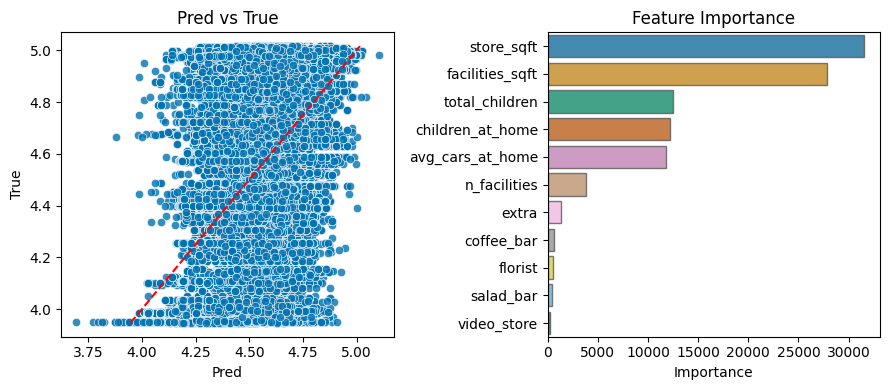

In [33]:
sub[target] = np.expm1(lgb_pred)

#sub.to_csv('lgb.csv', index=False)

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.scatterplot(x=lgb_valid, y=y_valid_raw, ax=axes[0], alpha=0.8, color=palette[0])
axes[0].plot([min(y_valid_raw), max(y_valid_raw)], [min(y_valid_raw), max(y_valid_raw)], 
             color='red', linestyle='--')
axes[0].set_title('Pred vs True')
axes[0].set_xlabel('Pred')
axes[0].set_ylabel('True')

sns.barplot(x=lgb_imp, y=lgb_col, ax=axes[1], orient='h', palette=palette, 
            edgecolor='#595959', alpha=0.8)
axes[1].set_title('Feature Importance')
axes[1].set_xlabel('Importance'); axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

## <div style="background-color:Teal;color:Beige;padding:10px;font-size:28px;font-family:Roboto Condensed;text-align:center;margin:0;overflow:hidden;border:5px solid Beige;border-radius:10px;">07 - XGBoost Model</div>

In [34]:
'''
def objective(trial):
    param = {
        'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.15, step=0.01),
        'max_depth': trial.suggest_int('max_depth', 12, 12, step=1),

        'alpha': trial.suggest_float('alpha', 0, 1, step=0.01),
        'lambda': trial.suggest_float('lambda', 0, 1, step=0.01),
        'gamma': trial.suggest_float('gamma', 0, 1, step=0.01),
        
        'max_delta_step': trial.suggest_float('max_delta_step', 0, 10, step=0.1),
        'min_child_weight': trial.suggest_float('min_child_weight', 0, 10, step=0.1),
        
        'subsample': trial.suggest_float('subsample', 0.2, 1, step=0.1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.2, 1, step=0.1),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.2, 1, step=0.1),
        'colsample_bynode': trial.suggest_float('colsample_bynode', 0.2, 1, step=0.1)
    }

    all_y_pred, all_y_valid, iterations  = [], [], []
    for x_train, x_valid, y_train, y_valid in folds:
        model = XGBRegressor(
            **param,
            tree_method='gpu_hist',
            n_estimators=2000, objective='reg:squarederror', eval_metric='rmse',
            random_state=seed, early_stopping_rounds=200)

        model.fit(x_train,y_train,eval_set=[(x_train,y_train),(x_valid,y_valid)],verbose=0)

        y_pred = model.predict(x_valid)
        all_y_pred.extend(y_pred)
        all_y_valid.extend(y_valid)
        iterations.append(model.best_iteration)

    rmse = mean_squared_error(all_y_valid, all_y_pred, squared=False)
    print(f'##### RMSE = {rmse:.5f}, iteration = {np.mean(iterations):.0f} #####')
    return rmse

xgb_study = optuna.create_study(direction='minimize', 
                                sampler=optuna.samplers.TPESampler(seed=seed))
xgb_study.optimize(objective, n_trials=300)

print('---');print(f'best rmse: {xgb_study.best_trial.value:.5f}')
print(f'best_param = {xgb_study.best_trial.params}')
'''

"\ndef objective(trial):\n    param = {\n        'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.15, step=0.01),\n        'max_depth': trial.suggest_int('max_depth', 12, 12, step=1),\n\n        'alpha': trial.suggest_float('alpha', 0, 1, step=0.01),\n        'lambda': trial.suggest_float('lambda', 0, 1, step=0.01),\n        'gamma': trial.suggest_float('gamma', 0, 1, step=0.01),\n        \n        'max_delta_step': trial.suggest_float('max_delta_step', 0, 10, step=0.1),\n        'min_child_weight': trial.suggest_float('min_child_weight', 0, 10, step=0.1),\n        \n        'subsample': trial.suggest_float('subsample', 0.2, 1, step=0.1),\n        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.2, 1, step=0.1),\n        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.2, 1, step=0.1),\n        'colsample_bynode': trial.suggest_float('colsample_bynode', 0.2, 1, step=0.1)\n    }\n\n    all_y_pred, all_y_valid, iterations  = [], [], []\n    for x_

In [35]:
best_param = {'learning_rate': 0.095, 'max_depth': 12, 'alpha': 0.64, 'lambda': 0.75, 
              'gamma': 0.0, 'max_delta_step': 8.0, 'min_child_weight': 8.1, 'subsample': 1.0, 
              'colsample_bytree': 0.84, 'colsample_bylevel': 0.97, 'colsample_bynode': 0.96}

rmse, r2, iter, imp, y_valid_raw, xgb_valid, xgb_pred = [], [], [], [], [], [], 0
y_test_pred = np.zeros(x_test.shape[0])

for i, (x_train, x_valid, y_train, y_valid) in enumerate(folds):

    model = XGBRegressor(
        **best_param,
        tree_method='gpu_hist',
        n_estimators=5000, objective='reg:squarederror', eval_metric='rmse', 
        random_state=seed, early_stopping_rounds=200)

    model.fit(x_train, y_train, eval_set=[(x_train, y_train),(x_valid, y_valid)],verbose=0)

    y_valid_pred = model.predict(x_valid)

    rmse.append(mean_squared_error(y_valid, y_valid_pred, squared=False))
    r2.append(r2_score(y_valid, y_valid_pred))
    iter.append(model.best_iteration)
    imp.append(model.feature_importances_)
    
    y_valid_raw.extend(y_valid)
    xgb_valid.extend(y_valid_pred)
    xgb_pred += model.predict(x_test) / len(folds)
    
    print(f'Fold {i+1}: rmse: {rmse[-1]:.5f}, r2: {r2[-1]:.5f}, best_iter: {iter[-1]}')

imp = np.array(imp)
idx = np.argsort(np.mean(imp, axis=0))[::-1]
xgb_imp = np.mean(imp, axis=0)[idx][:20]
xgb_col = np.array(x_train.columns)[idx][:20]

print('---');
print(f'Average rmse: {mean_squared_error(xgb_valid, y_valid_raw, squared=False):.5f}');
print(f'Average r2: {r2_score(y_valid_raw, xgb_valid):.5f}');

Fold 1: rmse: 0.29309, r2: 0.14272, best_iter: 199
Fold 2: rmse: 0.29329, r2: 0.14187, best_iter: 107
Fold 3: rmse: 0.29245, r2: 0.14451, best_iter: 190
Fold 4: rmse: 0.29224, r2: 0.15012, best_iter: 194
Fold 5: rmse: 0.29380, r2: 0.14188, best_iter: 154
---
Average rmse: 0.29297
Average r2: 0.14423


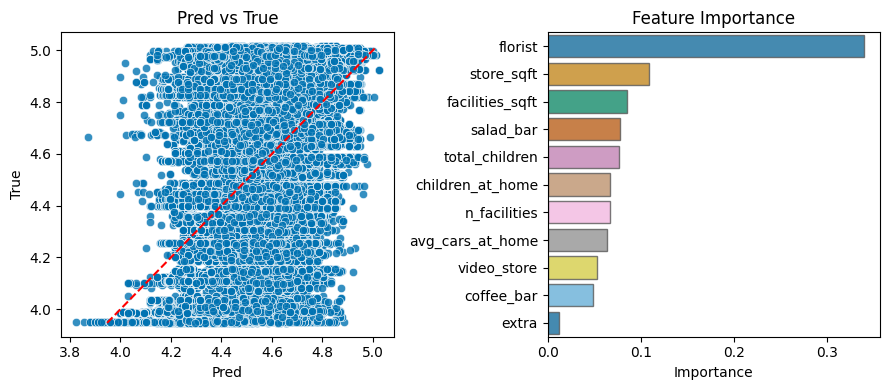

In [36]:
sub[target] = np.expm1(xgb_pred)

#sub.to_csv('xgb.csv', index=False)

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.scatterplot(x=xgb_valid, y=y_valid_raw, ax=axes[0], alpha=0.8, color=palette[0])
axes[0].plot([min(y_valid_raw), max(y_valid_raw)], [min(y_valid_raw), max(y_valid_raw)], 
             color='red', linestyle='--')
axes[0].set_title('Pred vs True')
axes[0].set_xlabel('Pred')
axes[0].set_ylabel('True')

sns.barplot(x=xgb_imp, y=xgb_col, ax=axes[1], orient='h', palette=palette, 
            edgecolor='#595959', alpha=0.8)
axes[1].set_title('Feature Importance')
axes[1].set_xlabel('Importance'); axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

## <div style="background-color:Teal;color:Beige;padding:10px;font-size:28px;font-family:Roboto Condensed;text-align:center;margin:0;overflow:hidden;border:5px solid Beige;border-radius:10px;">08 - Final Submission</div>

In [37]:
average_pred = (
    lgb_pred * 0.6
    + xgb_pred * 0.4
            )

sub[target] = np.expm1(average_pred)

sub.to_csv("submission.csv",index=False)

## <div style="background-color:Teal;color:Beige;padding:10px;font-size:32px;font-family:Roboto Condensed;text-align:center;margin:0;overflow:hidden;border:2px solid Beige;border-radius:5px;"></div>